# Basisversion neuronales Netz
Im folgenden Jupyter Notebook wird auf die vorliegende "Basisversion" des neuronalen Netzes und dessen Ergebnisse eingegangen. In dem weiteren Jupyter Notebook **(loki.ipynb)** ist das auf die **Genaugigkeit (accuracy)** optimierte neuronale Netz aufgeführt. Die ausführlichere Dokumentation ist in **neural_network_Moritz_Kramer_Doku.PDF** zu finden.


## Vorbereitungen
In den nächsten Codeblöcken werden die für den spätern Verlauf benötigten Packages importiert.

In [1]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [4]:

# We will use this cell to import all the packages you will need in the following - think of it as turning on all your systems
# in your cockpit

# This makes sure that if you change code in your external scripts, they will be updated


import checker
import generator

from IPython.display import display, clear_output
import numpy as np
import time
import math
import matplotlib.pyplot as plt
import seaborn as sn
import pandas as pd

import importlib
importlib.reload(checker)
importlib.reload(generator)

# now go ahead and Run the cell. This might take a while...
# while the cell is running, you will see ln[*] next to it. Once it finished, you will see the number of execution
# In case you want to interrupt the run of a cell, press Ctrl + C (on your german keyboard, this is Strg + C) 
import tensorflow as tf

## MNIST-Datensatz
Der MNIST-Datensatz liefert die für das Training und Testen benötigten Daten. Hierbei wird mit 60 000 Bildern trainiert und mit weiteren 10 000 Bildern getestet

x_train: (60000, 28, 28)
y_train: (60000,)
x_test: (10000, 28, 28)
y_test: (10000,)

 Plot of the first 25 samples in the MNIST training set


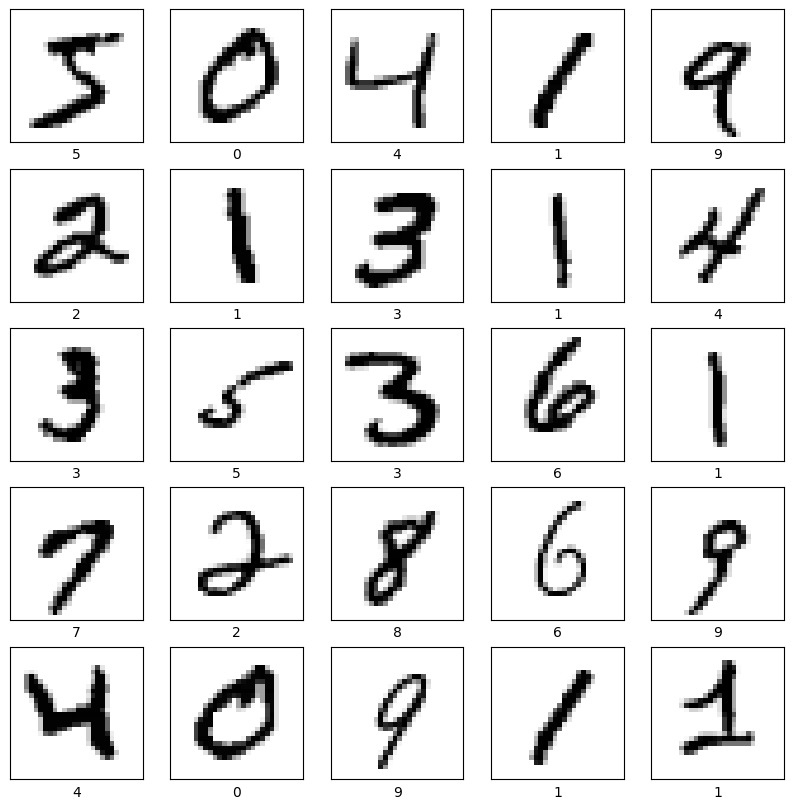

In [5]:
# Loading the MNIST dataset in one line
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Printing the shape
print('x_train:', x_train.shape)
print('y_train:', y_train.shape)
print('x_test:', x_test.shape)
print('y_test:', y_test.shape)

# Plotting data samples
print('\n Plot of the first 25 samples in the MNIST training set')
numbers_to_display = 25
num_cells = math.ceil(math.sqrt(numbers_to_display))
plt.figure(figsize=(10,10))
for i in range(numbers_to_display):
    plt.subplot(num_cells, num_cells, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(y_train[i])
plt.show()

In [6]:
x_train_normalized = x_train/255 
x_test_normalized = x_test/255

# in the next step, we also need to reshape our input to fit our input layer later on. 
# This is due to keras expecting a definition for how many channels your input sample has, as we 
# deal with gray scale this is 1.
x_train= x_train_normalized.reshape(-1, 28, 28, 1)
x_test = x_test_normalized.reshape(-1, 28, 28, 1)


In [7]:
'''
 ____   __   __ _  __  ____  _  _     ___  _  _  ____  ___  __ _ 
/ ___) / _\ (  ( \(  )(_  _)( \/ )   / __)/ )( \(  __)/ __)(  / )
\___ \/    \/    / )(   )(   )  /   ( (__ ) __ ( ) _)( (__  )  ( 
(____/\_/\_/\_)__)(__) (__) (__/     \___)\_)(_/(____)\___)(__\_)

Do not touch, just run!
'''
checker.test_normalize(x_train, x_train_normalized)


Normalization worked out well, you are ready to go.


## Netzarchitektur
Die in der Basisversion implementierte Netzarchitektur stellt ein sequentielles Modell mit drei verschiedenen Layern dar. Lediglich mit einem Flatten-, Dense- und Dropout-Layer. Diese Architektur soll als eine Grundlage zur weiteren Optimierung des Netzes dienen.

In [8]:
# This is the moment where you define your model's architecture

marvin = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28,28,1 )),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
])

marvin.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
Total params: 100480 (392.50 KB)
Trainable params: 100480 (392.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## Design des Trainings

In [9]:
# Define your loss
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)


print(-tf.math.log(1/10))

sampleID = 100
loss_fn(y_train[:1], marvin(x_train[sampleID-1:sampleID]).numpy()).numpy()

tf.Tensor(2.3025851, shape=(), dtype=float32)


4.9509873

In [10]:
# Compiling basically means to prepare the training routine for your model which consists of the optimizer, 
# the loss, and the metrics which are to be reported during training

marvin.compile(optimizer='adam',
              loss= loss_fn ,
              metrics=['accuracy'])


## Training
Das Modell trainiert hier 50 Epochen mit einer Batch-Size von 516.

In [11]:
# get ready for your first training run.

marvin.fit(
    x_train,
    y_train,
    epochs= 50,
    batch_size= 516,
    validation_data=(x_test, y_test)
    # callbacks=[tensorboard_callback]
)

Epoch 1/50


117/117 [==============================] - 1s 5ms/step - loss: 2.5460 - accuracy: 0.5266 - val_loss: 1.1411 - val_accuracy: 0.8550
Epoch 2/50
117/117 [==============================] - 0s 4ms/step - loss: 1.6623 - accuracy: 0.7041 - val_loss: 0.8486 - val_accuracy: 0.8848
Epoch 3/50
117/117 [==============================] - 0s 4ms/step - loss: 1.5503 - accuracy: 0.7152 - val_loss: 0.7419 - val_accuracy: 0.8960
Epoch 4/50
117/117 [==============================] - 0s 4ms/step - loss: 1.4851 - accuracy: 0.7244 - val_loss: 0.6802 - val_accuracy: 0.9022
Epoch 5/50
117/117 [==============================] - 0s 4ms/step - loss: 1.4491 - accuracy: 0.7293 - val_loss: 0.6424 - val_accuracy: 0.9077
Epoch 6/50
117/117 [==============================] - 0s 4ms/step - loss: 1.4383 - accuracy: 0.7308 - val_loss: 0.6081 - val_accuracy: 0.9104
Epoch 7/50
117/117 [==============================] - 0s 4ms/step - loss: 1.3926 - accuracy: 0.7376 - val_loss: 0.5809 - val_accuracy: 0.9125
Epoc

In [12]:

# after the training finishes, we will also save Marvin in Keras style (HDF5), so we do not have to 
# train him again
# every time we start our computer. Obviously, by changing the model_name, you can also save different
# configurations of Marvin. The name has to be a string, like this: 'name.h5'
model_name = 'marvin.h5'
marvin.save(model_name, save_format='h5')

# It is best practice to indicate what configuration changes you did within the name, so you know
# which model you need to load already from its name
# Let's say instead of a learning rate of 0.001 you used 0.1, your naming could then look like:
# 'marvin_lr01.h5'

print('Success! You saved Marvin as: ', model_name)


Success! You saved Marvin as:  marvin.h5


C:\Users\krame\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



## Auswertung
Nun wird die gewünschte Konfiguration des Modells geladen und mit den Testdaten auf seine Performance evaluiert. Die Ergebnisse bezüglich des Loss und der Accuracy werden nach Ausführung des Jupyter Notebooks unter dem fogenden Codeblock ausgegeben. Im weiteren Verlauf sind grafische Auswertungen des Ergebnisses zu sehen.

In [13]:
# load a saved marvin configuration you want to evaluate
model_name = 'marvin.h5' 
marvin_reloaded = tf.keras.models.load_model(model_name)

# Let Marvin predict on the test set, so we have some data to evaluate his performance.
predictions = marvin_reloaded.predict([x_test])

# Remember that the prediction of Marvin is a probability distribution over all ten-digit classes
# We want him to assign the digit class with the highest probability to the sample.
predictions = np.argmax(predictions, axis=1)
#pd.DataFrame(predictions)


(test_loss, test_acc) = marvin_reloaded.evaluate(x_test, y_test)
print("Loss: ", test_loss)
print("Accuracy: ",test_acc)

313/313 [==============================] - 1s 1ms/step - loss: 0.4433 - accuracy: 0.9252
Loss:  0.4432685077190399
Accuracy:  0.9251999855041504


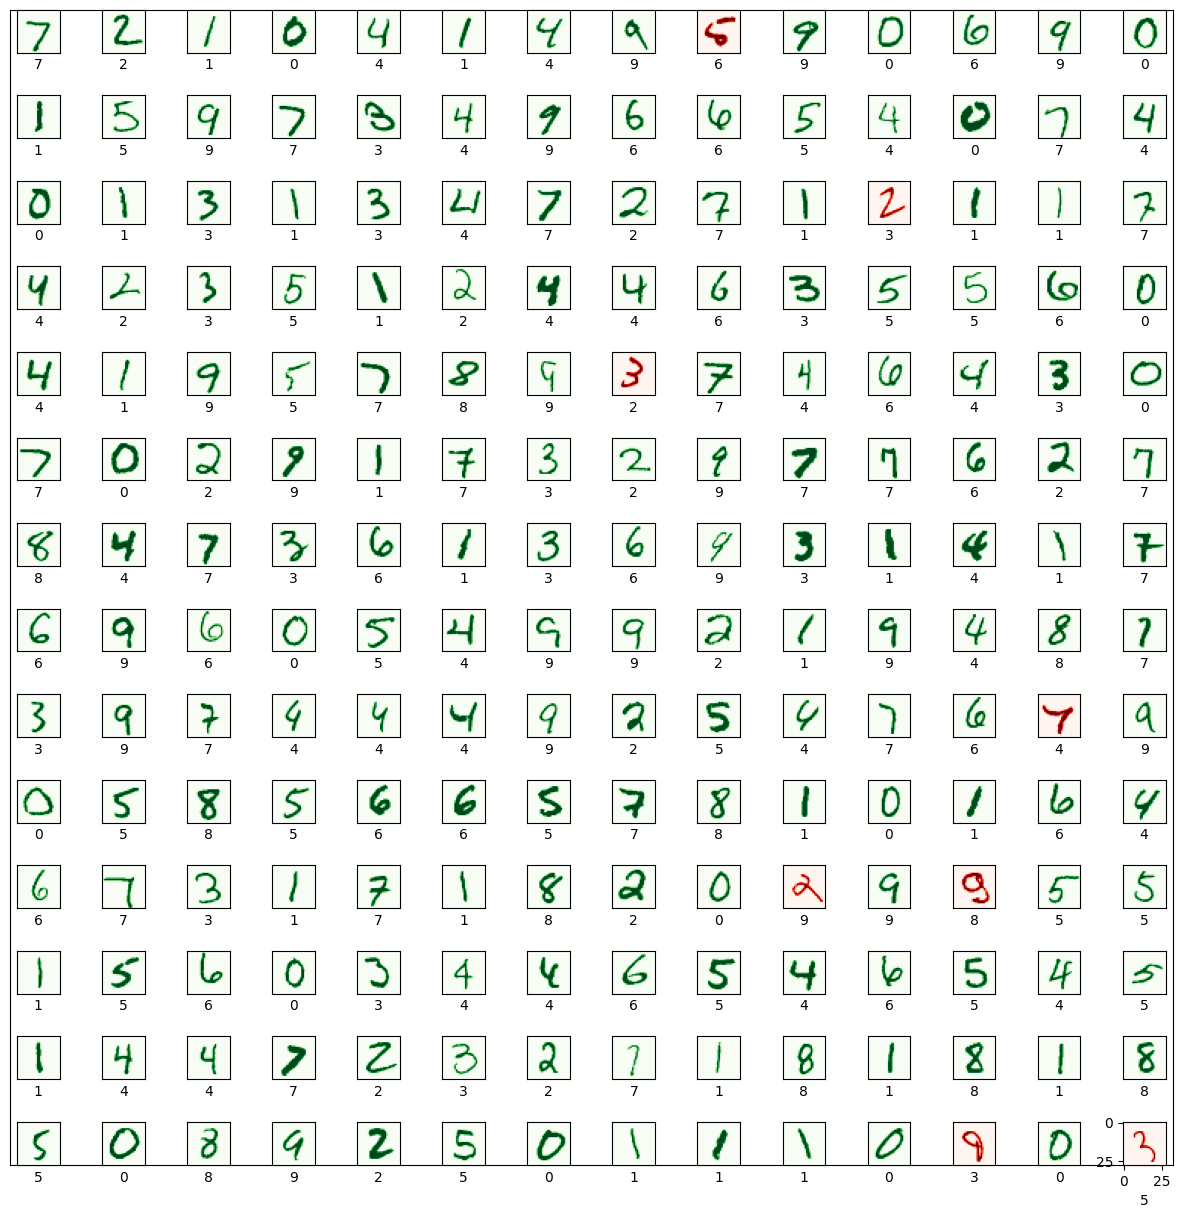

In [14]:

# Plot for the intuitive approach

numbers_to_display = 196
num_cells = math.ceil(math.sqrt(numbers_to_display))
plt.figure(figsize=(15, 15))

for plot_index in range(numbers_to_display):    
    predicted_label = predictions[plot_index]
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    color_map = 'Greens' if predicted_label == y_test[plot_index] else 'Reds'
    plt.subplot(num_cells, num_cells, plot_index + 1)
    plt.imshow(x_test_normalized[plot_index].reshape((28, 28)), cmap=color_map)
    plt.xlabel(predicted_label)

plt.subplots_adjust(hspace=1, wspace=0.5)
plt.show()



### Confusion Matrix

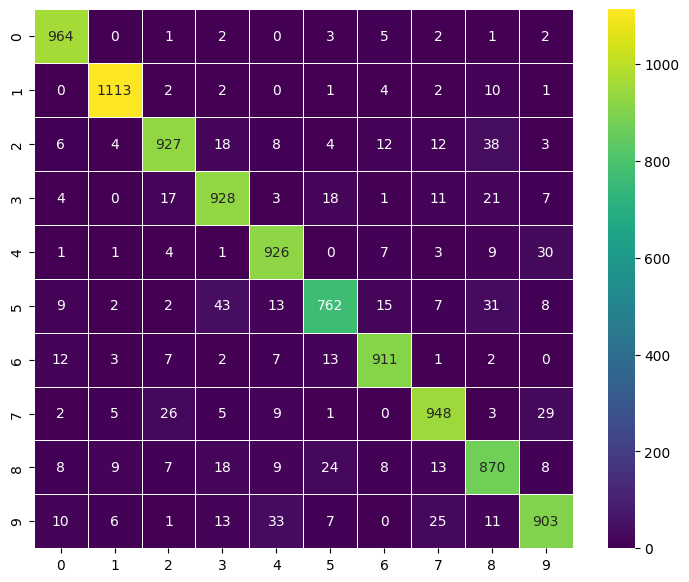

In [15]:
confusion_matrix = tf.math.confusion_matrix(y_test, predictions)

f, ax = plt.subplots(figsize=(9, 7))
sn.heatmap(
    confusion_matrix,
    annot=True,
    linewidths=.7,
    fmt="d",
    square=True,
    ax=ax,
    cmap="viridis",
)
plt.show()

## Abhängigkeiten

In [16]:
!pip install watermark -q

In [17]:
%load_ext watermark
%watermark -v -m -p checker,generator,display,clear_output,numpy,time,math,matplotlib,seaborn,pandas,importlib,tensorflow,watermark
%watermark -u -n -t -z

Python implementation: CPython
Python version       : 3.11.6
IPython version      : 8.19.0

checker     : unknown
generator   : unknown
display     : not installed
clear_output: not installed
numpy       : 1.26.3
time        : unknown
math        : unknown
matplotlib  : 3.8.2
seaborn     : 0.13.1
pandas      : 2.1.4
importlib   : unknown
tensorflow  : 2.15.0
watermark   : 2.4.3

Compiler    : MSC v.1935 64 bit (AMD64)
OS          : Windows
Release     : 10
Machine     : AMD64
Processor   : Intel64 Family 6 Model 140 Stepping 1, GenuineIntel
CPU cores   : 8
Architecture: 64bit

Last updated: Thu Jan 04 2024 22:39:54Mitteleuropäische Zeit

